## Multiple Linear Regression

### Boombikes Case Study

Problem Statement:
   * A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues 
    due to the ongoing Corona pandemic. 
   * The company is finding it very difficult to sustain in the current market scenario.
   * BoomBikes aspires to understand the demand for shared bikes among 
    the people after this ongoing quarantine situation ends across the nation due to Covid-19.
    

The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

### Step 1:Reading and Understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [3]:
boombikes_day = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
boombikes_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Inspecting the various aspects of the housing dataframe

In [6]:
boombikes_day.shape

(730, 16)

In [7]:
boombikes_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
boombikes_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Exploratory Data Analysis

#### Checking for missing values

In [9]:
#set the max rows to none
pd.set_option('display.max_rows', None)

boombikes_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#reseting max rows
pd.reset_option("max_rows")

We can see there are no null values in the data.

### Step 2: Data Cleaning

##### Removing unwanted columns

#Removing unwanted columns
After looking at the data , the following variables can be removed from further analysis:

instant : It's an index column.not that relevant hence we can drop this column.

dteday : Since we already have seperate columns for 'year' & 'month',so we can this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Objective is to find the total count of bikes and not by specific category, hence we can these two columns.

In [11]:
boombikes_day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [12]:
boombikes_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:

# data points from 2018
boombikes_day.loc[boombikes_day['yr'] ==0,:].shape[0]

365

In [14]:

# data points from 2019
boombikes_day.loc[boombikes_day['yr'] ==1,:].shape[0]

365

#### Converting data from numeric to object for Categorical columns

We can see there are few columns that refer to categorical values but are present as numerical values in the data.
Hence we convert thodse columns to categorical values.

In [15]:
# Converting 'weathersit' and 'season' column values 1,2,3,4 into string categorical values based on data dictionary

boombikes_day['season'] = boombikes_day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombikes_day['weathersit'] = boombikes_day['weathersit'].map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Snow'})

In [16]:
# Converting 'yr' column values 0 and 1 into string  values 2018 and 2019 respectively

#boombikes_day['yr'] =boombikes_day['yr'].map({0:'2018', 1:'2019'})
#there is no use converting yr to categorical column here as we would have to
#convert it back in same format for dummy variable creation

In [17]:

# Converting 'mnth' column values 1 to 12 to Jan to Dec respectively

boombikes_day['mnth'] = boombikes_day['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [18]:
# Converting 'weekday' column values 0 and 6 into string  values Monday to Sunday

boombikes_day['weekday'] = boombikes_day['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

In [19]:
boombikes_day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Wednesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Thursday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Friday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Saturday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Saturday,1,Mist & Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Sunday,0,Mist & Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Monday,0,Mist & Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Tuesday,1,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [20]:
boombikes_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [21]:
#We can see there is no null value in the data

In [22]:
boombikes_day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [23]:
boombikes_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Step 3: Visualising the Data

#### Analysing Numerical data

#### Visualising Numeric Variables

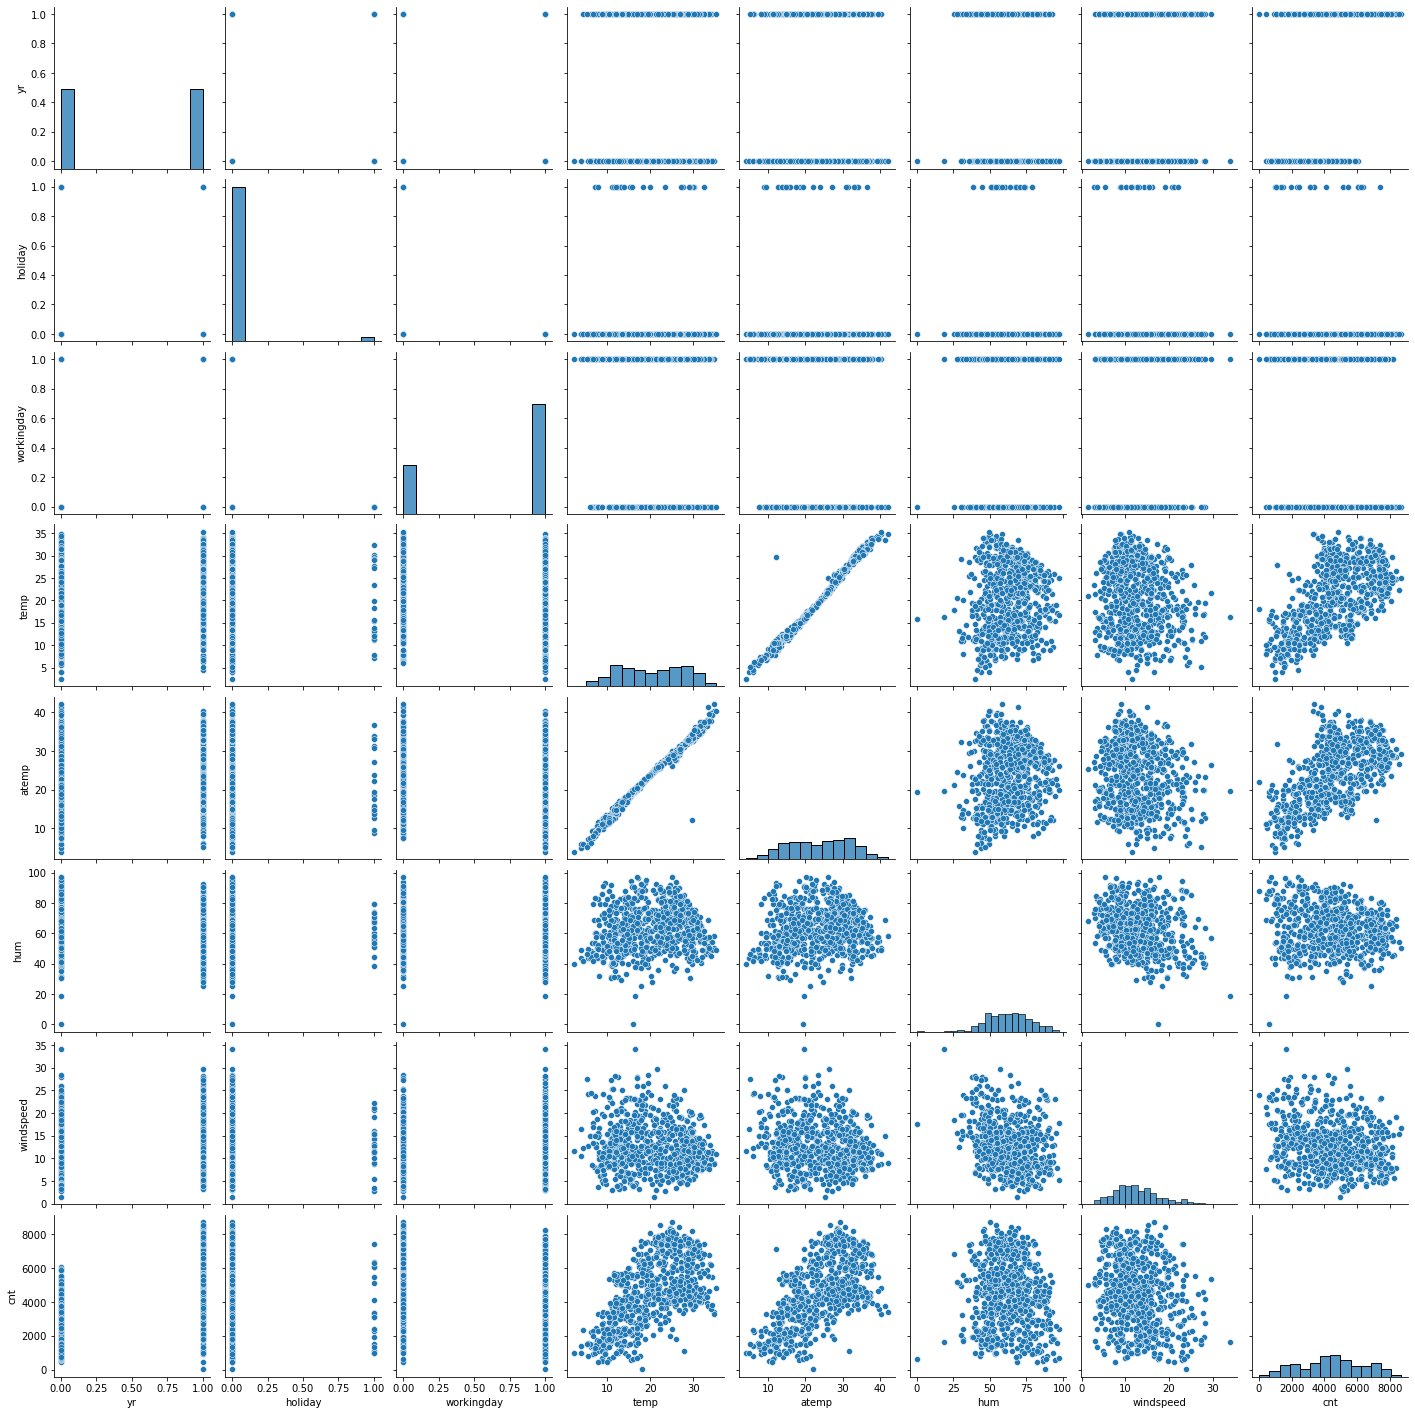

In [24]:
#for numerical values
sns.pairplot(boombikes_day)
plt.show()

Observation:
* We can see temp and cnt have high positive correlation 
* temp and atemp seem to be redundant and most of the points are overlapping.

<Figure size 1440x720 with 0 Axes>

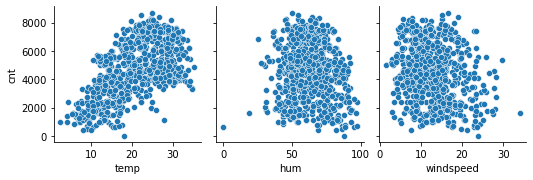

In [25]:
plt.figure(figsize=(20,10))
sns.pairplot(x_vars=['temp', 'hum', 'windspeed'], y_vars=['cnt'], data=boombikes_day)
plt.show()

temp and cnt have correlation while hum and windspeed are scattered.

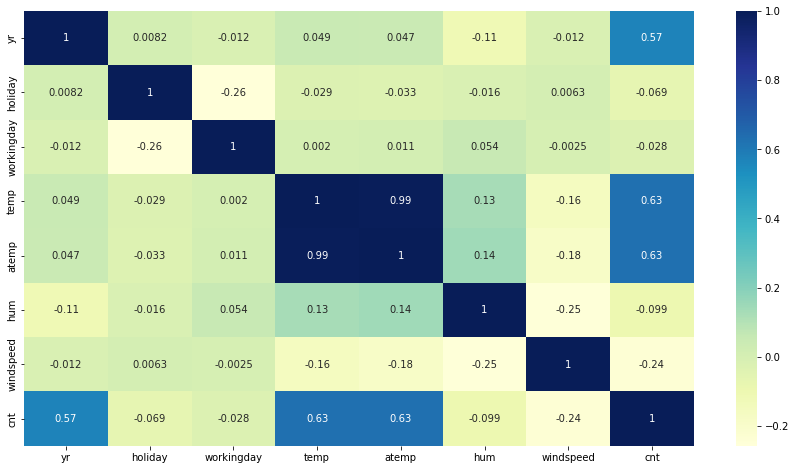

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(boombikes_day.corr(), cmap="YlGnBu", annot = True)
plt.show()

Observation:
*    It can be observed that temp and atemp are highly correlated(.99). 
*    Hence we can drop variable atemp to avoid multicollinearity in the model.

In [27]:
#dropping atemp
boombikes_day.drop(['atemp'], axis=1, inplace=True)

In [28]:
boombikes_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Wednesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Thursday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Friday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Saturday,1,Clear,9.305237,43.6957,12.522300,1600


### Univariate Analysis

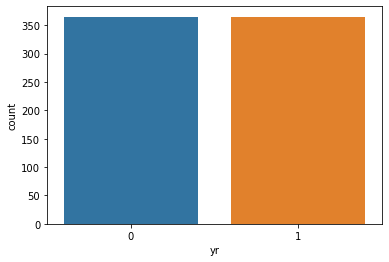

In [29]:

sns.countplot(x ='yr',data = boombikes_day)
plt.show()

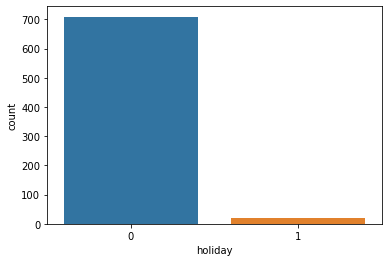

In [30]:
sns.countplot(x = 'holiday' , data = boombikes_day  )
plt.show()

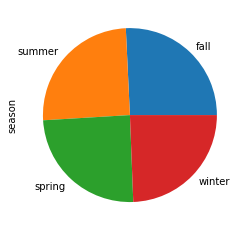

In [31]:
boombikes_day.season.value_counts().plot.pie()
plt.show()

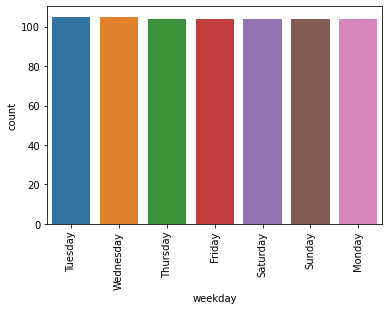

In [32]:
sns.countplot(x = 'weekday' , data = boombikes_day  )
plt.xticks(rotation=90)
plt.show()

We can see not much conclusions can be drawn from the univariate analysis. Lets move to Bivariate analysis.

### Bivariate Analysis

#### Visualising Categorical Variables with the target variable

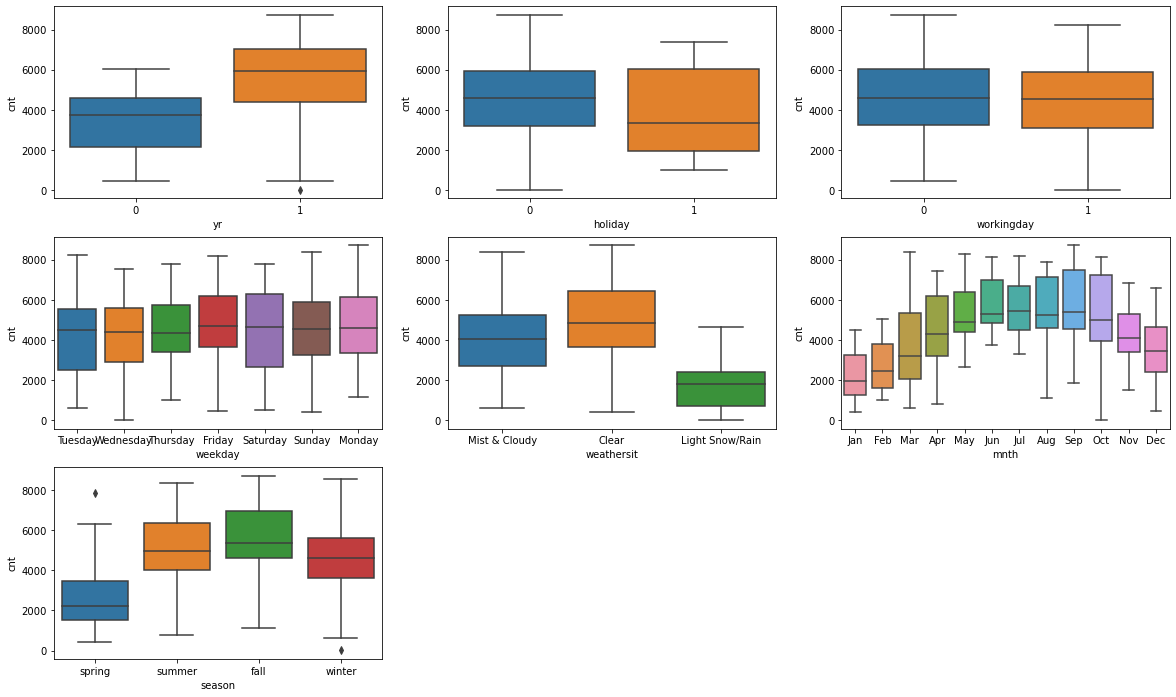

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes_day)
plt.show()

Observation:
*    The count of rented bikes increases from January till July , dips in aug ,picks up pace in September where it registers maximum rentals
     and then the rental count decreases.
*    The average count of bikes rental has increased in 2019(in data marked yr as 1) compared to 2018 (in data marked yr as 0).   
*    Majority of rentals happen in fall season followed by summer and winter. The least amount of bike bookings occurs in spring.                  
*    When there is a holiday median demand has decreased. 
*    Total rental count of bikes seems to be higher when the weather is clear and is minimum in Light Snow/Rain.                  

We can also visualise some of these categorical features parallely by using the hue argument.

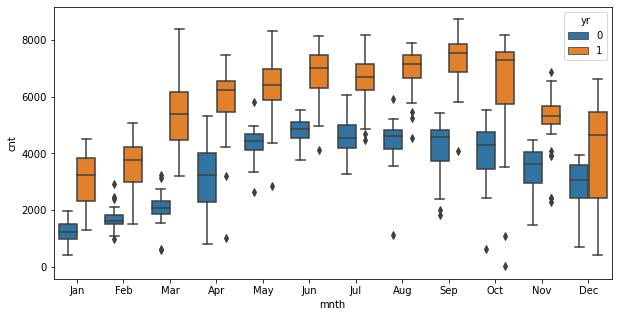

In [34]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = boombikes_day)
plt.show()

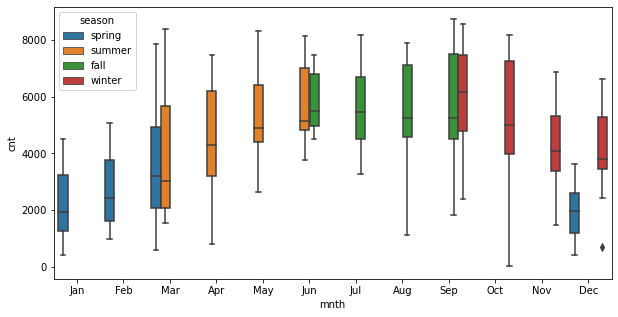

In [35]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'season', data = boombikes_day)
plt.show()

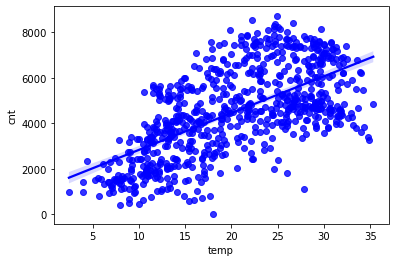

In [36]:
sns.regplot(x='temp', y='cnt', data=boombikes_day, color = 'b')
plt.show()

Observation
* Total rental count of bikes seems to have a positive co-relation with temperature (Celsius) and the relationship also seems to be linear in nature.

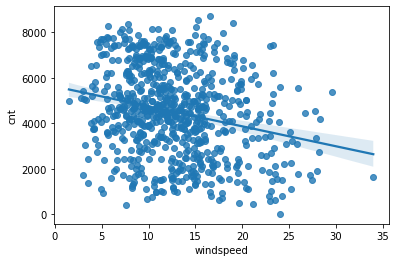

In [37]:
sns.regplot('windspeed','cnt',boombikes_day)
plt.show()

Observation:
*    Total rental count of bikes seems not having a clear relationship with humidity as the values seems scattered around a central point. Although we see that the rental count is decreasing as windspeed values are going up.

#### Outlier Test

In [38]:
boombikes_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [39]:
boombikes_day.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

In [40]:
#segregating continuous/numerical columns
num = ['temp','hum','windspeed','cnt']

temp


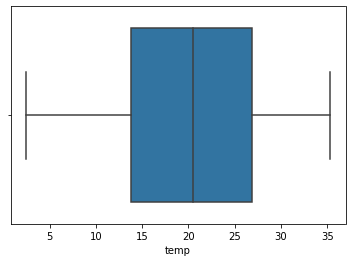

hum


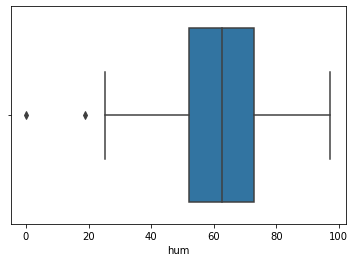

windspeed


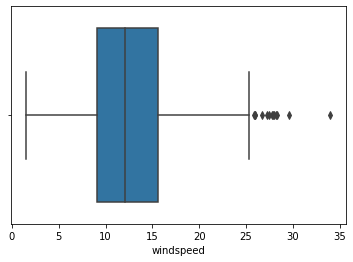

cnt


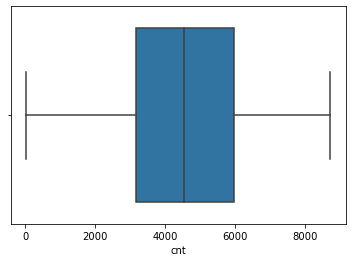

In [41]:
#checking for outliers plotting boxplot
for i in num:
    print(i)
    sns.boxplot(boombikes_day[i])
    plt.show()
    


Observation:
*  We can see there are few outliers in windspeed and one or two outlier in humidity.Let us keep them as it is for now.    

### Step 4: Data Preparation

Dummy Variables
*  Some features/categorical columns in our dataframe have different levels. We need to convert these levels into integer.
*  We can use dummy variables for this.
* Dummy variables would help us in model creation

#### Dummy variables for 'season'

In [42]:
#creating dummy variables for season col
season_code = pd.get_dummies(boombikes_day['season'])

In [43]:
season_code

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


we don't need 4 columns as seasons can be coded in dummy variables as below:
- 000 will correspond to fall
- 001 will correspond to winter
- 010 will correspond to summer
- 100 will correspond to spring
  Hence dropping the first column


In [44]:
#dropping the firsrt dummy column to avoid multicollinearly that would arise because of dummy varable
season_code  = pd.get_dummies(boombikes_day['season'], drop_first = True)

In [45]:
season_code 

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [46]:
# Adding the results to the original dataframe

boombikes_day = pd.concat([boombikes_day, season_code], axis = 1)

In [47]:
boombikes_day

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Wednesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Thursday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Friday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Saturday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Saturday,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,0,0
726,spring,1,Dec,0,Sunday,0,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,0,0
727,spring,1,Dec,0,Monday,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,0,0
728,spring,1,Dec,0,Tuesday,1,Clear,10.489153,48.3333,23.500518,1796,1,0,0


In [48]:
# Drop 'season' column as we have created the dummies for it

boombikes_day.drop(['season'], axis = 1, inplace = True)

In [49]:
boombikes_day

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Tuesday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Wednesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Thursday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Friday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Saturday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,Saturday,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,0,0
726,1,Dec,0,Sunday,0,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,0,0
727,1,Dec,0,Monday,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,0,0
728,1,Dec,0,Tuesday,1,Clear,10.489153,48.3333,23.500518,1796,1,0,0


In [50]:
boombikes_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    object 
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
dtypes: float64(3), int64(4), object(3), uint8(3)
memory usage: 59.3+ KB


#### Dummy variables for 'mnth'

In [51]:
#creating dummy variables for mnth column
mnth_code = pd.get_dummies(boombikes_day['mnth'])

In [52]:
mnth_code

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,0,0,0,0,0,0
726,0,0,1,0,0,0,0,0,0,0,0,0
727,0,0,1,0,0,0,0,0,0,0,0,0
728,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
# dropping the first column from 'mnth_code' 

mnth_code = pd.get_dummies(boombikes_day['mnth'], drop_first = True)

In [54]:
mnth_code

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [55]:
# Adding the results to the original  dataframe

boombikes_day = pd.concat([boombikes_day, mnth_code], axis = 1)

In [56]:
# Droping 'mnth' column as we have created the dummies for it

boombikes_day.drop(['mnth'], axis = 1, inplace = True)

In [57]:
boombikes_day

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Tuesday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Wednesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Thursday,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Friday,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Saturday,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,Saturday,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,...,1,0,0,0,0,0,0,0,0,0
726,1,0,Sunday,0,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,...,1,0,0,0,0,0,0,0,0,0
727,1,0,Monday,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,...,1,0,0,0,0,0,0,0,0,0
728,1,0,Tuesday,1,Clear,10.489153,48.3333,23.500518,1796,1,...,1,0,0,0,0,0,0,0,0,0


#### Dummy variables for 'weekday'

In [58]:
#creating dummy variables for weekday column
weekday_code = pd.get_dummies(boombikes_day['weekday'])

In [59]:
weekday_code

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,0
726,0,0,0,1,0,0,0
727,0,1,0,0,0,0,0
728,0,0,0,0,0,1,0


In [60]:
# dropping the first column from 'weekday_code' 

weekday_code = pd.get_dummies(boombikes_day['weekday'], drop_first = True)

In [61]:
#weekday_code

In [62]:
# Adding the results to the original  dataframe

boombikes_day = pd.concat([boombikes_day, weekday_code], axis = 1)

In [63]:
# Droping 'weekday' column as we have created the dummies for it

boombikes_day.drop(['weekday'], axis = 1, inplace = True)

In [64]:
boombikes_day

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,Mist & Cloudy,10.420847,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,1,0,0,0,0
726,1,0,0,Mist & Cloudy,10.386653,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,0,1,0,0,0
727,1,0,0,Mist & Cloudy,10.386653,75.2917,8.333661,1341,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,1,Clear,10.489153,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Dummy variables for 'weathersit'

In [65]:
#generating dummies for weathersit
weathersit_code = pd.get_dummies(boombikes_day['weathersit'])

In [66]:
weathersit_code

,Clear,Light Snow/Rain,Mist & Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


##### We will not drop dummy from weatherit_code in order to avoid loss of data of weather conditions since already we can see that weatherit column contained 4 values but 3 dummy variables are created hence our condition for (n-1) dummy variables is already satisfied.

In [67]:
# Adding the results to the original  dataframe

boombikes_day = pd.concat([boombikes_day, weathersit_code], axis = 1)

In [68]:
# Droping 'weathersit' column as we have created the dummies for it

boombikes_day.drop(['weathersit'], axis = 1, inplace = True)

In [69]:
boombikes_day

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light Snow/Rain,Mist & Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,1,0,0,0,0,0,0,1
726,1,0,0,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,1,0,1,0,0


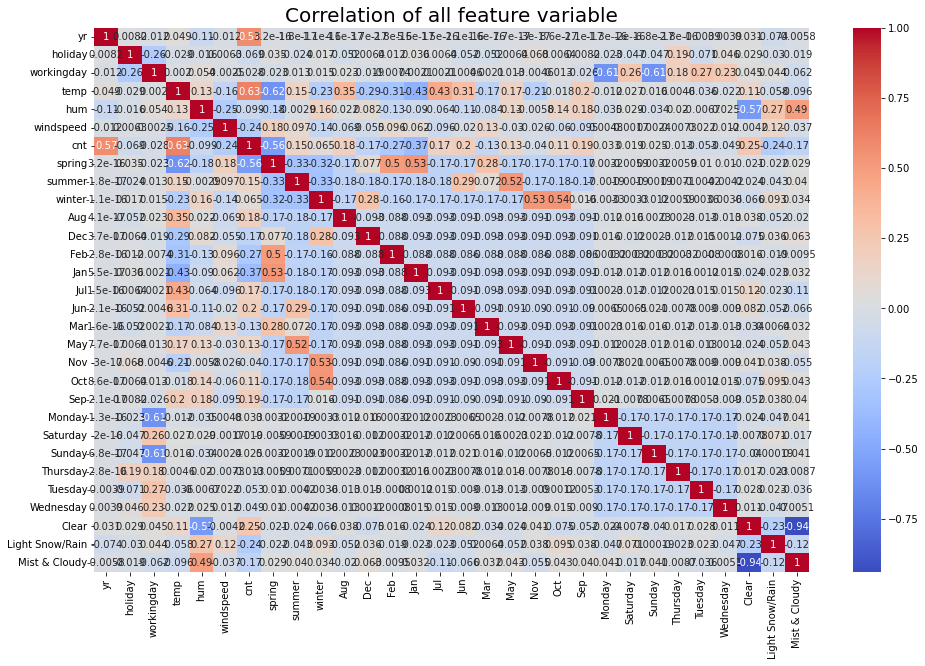

In [70]:
plt.figure(figsize=[16,10])
plt.title("Correlation of all feature variable", fontsize=20)
sns.heatmap(boombikes_day.corr(), annot=True, cmap='coolwarm')
plt.show()

In [71]:
boombikes_day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Clear', 'Light Snow/Rain',
       'Mist & Cloudy'],
      dtype='object')

### Step 5: Splitting the Data into Training and Testing Sets

We need to split the data provided into training set and test set . We will form our model on the training set and then test the model over the test data.

In [72]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes_day, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features
- Min-Max scaling 
- Standardisation (mean-0, sigma-1) 

##### Min-Max scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars1 = ['temp', 'hum', 'windspeed', 'cnt']
#fit-transform the train data
df_train[num_vars1] = scaler.fit_transform(df_train[num_vars1])

In [75]:

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light Snow/Rain,Mist & Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,1,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [76]:

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light Snow/Rain,Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


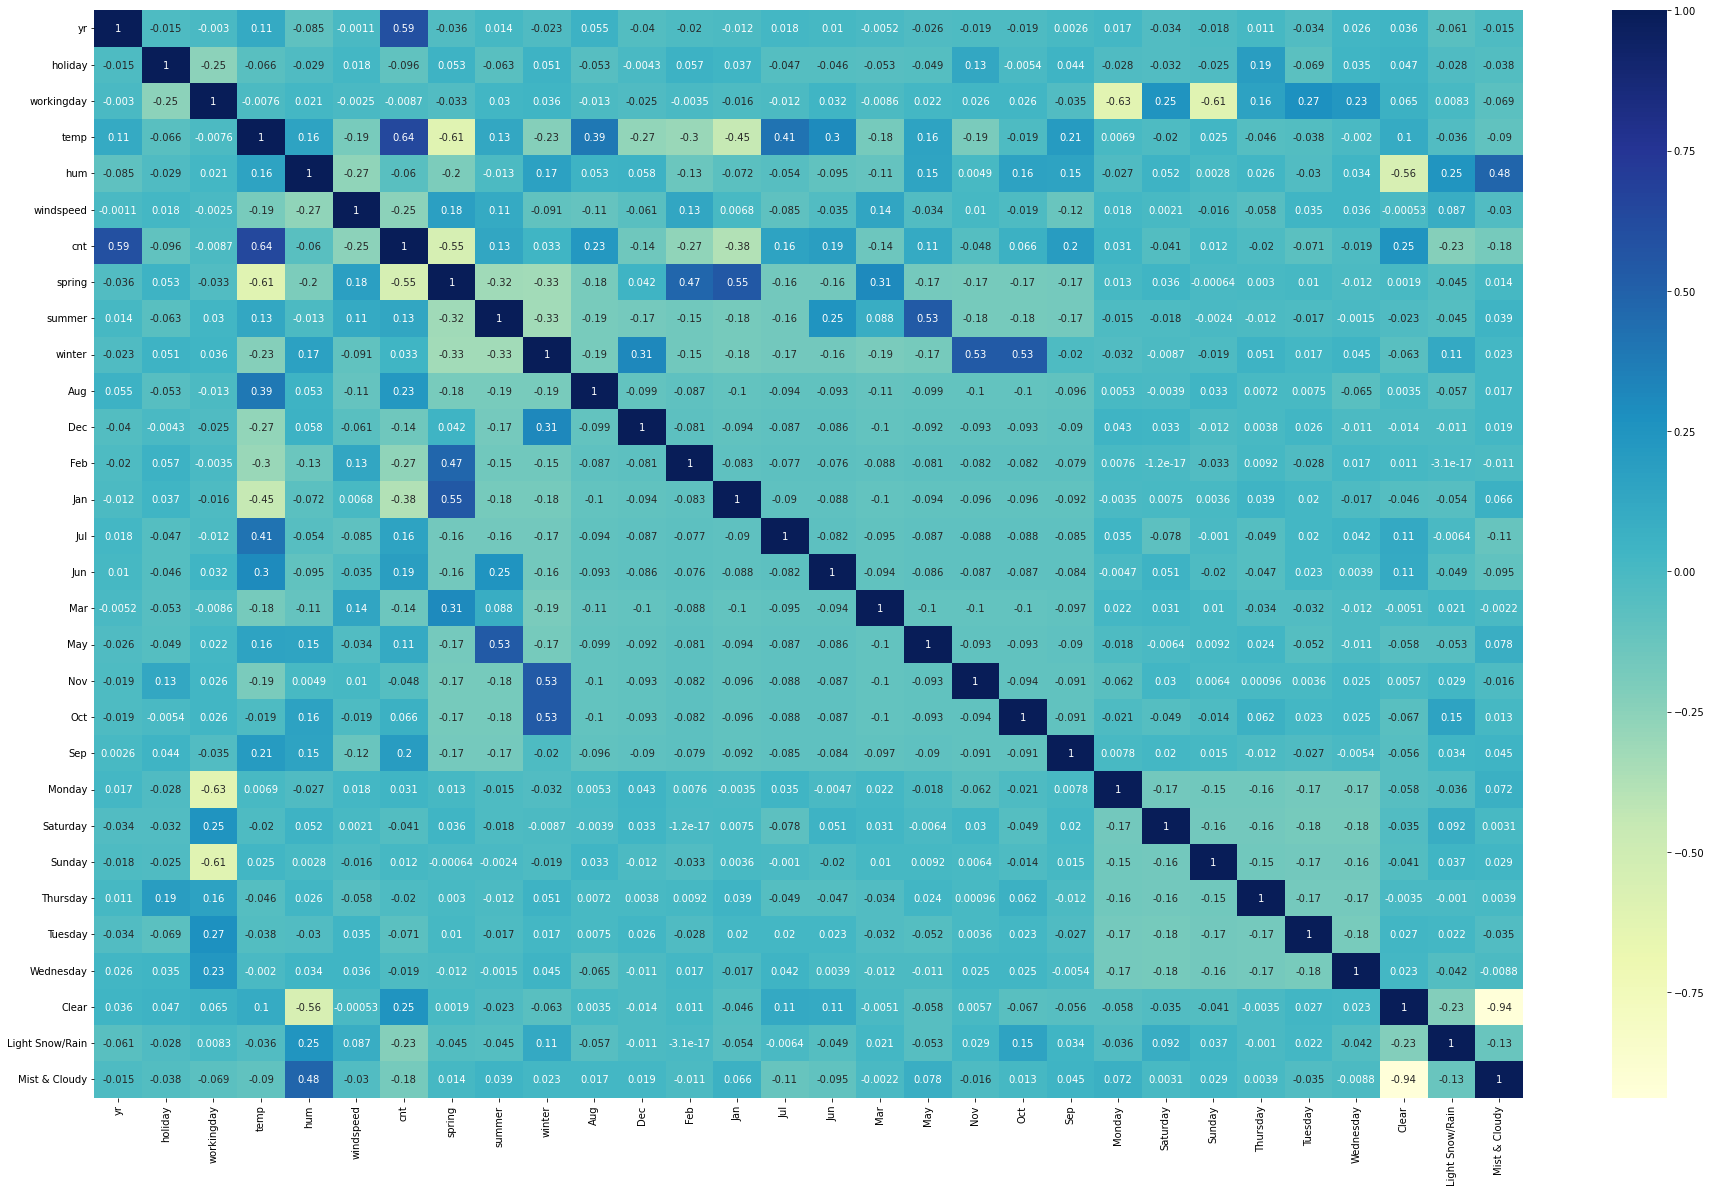

In [77]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observation:
    we can see that yr and cnt are highly correlated.

#### Dividing into X and Y sets for the model building

In [78]:
y_train=df_train.pop('cnt')
X_train=df_train

In [79]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 653 to 79
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


we can see 510 values in the train data which justifies to be 70% of 730 as we took while we split the data into train and test

### Step 6: Feature Selection and Modelling

We will use LinearRegression function from SciKit Learn for its compatibility with RFE .

#### RFE(Recursive feature elimination)

In [80]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Let us select 15 features with RFE and we can drop feature one by one to get a model apt. for us

In [81]:

# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train, y_train)  #fitting model to the training data

rfe = RFE(lr, n_features_to_select= 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [82]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 6),
 ('Saturday', False, 13),
 ('Sunday', False, 5),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 8),
 ('Clear', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Mist & Cloudy', True, 1)]

In [83]:
col1 = X_train.columns[rfe.support_]
col1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Nov', 'Sep', 'Clear', 'Light Snow/Rain',
       'Mist & Cloudy'],
      dtype='object')

In [84]:

X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [85]:
# Defining a funtion to train a statsmodel OLS based model, to avoid writing repeated code.
def stats_model(columns):
    X_train_sm = sm.add_constant(X_train[columns])  #adding a constant variable
    lm1 = sm.OLS(y_train, X_train_sm).fit()   #running the linear model
    print(lm1.summary())  #Let's see the summary of our linear model
    return lm1

In [86]:
# Defining a funtion calculate VIF based on columns, to avoid writing repeated code.
def calculate_vif(columns):
    df_X = X_train[columns].copy()
    vif = pd.DataFrame()
    vif['Features'] = df_X.columns
    vif['VIF'] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1 (including all columns suggested in RFE)

In [87]:
model1 = stats_model(col1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.25e-189
Time:                        14:21:18   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1533      0.029     

In [88]:
VIF1 = calculate_vif(col1)

           Features    VIF
12            Clear  49.16
14    Mist & Cloudy  32.33
5            spring   5.20
13  Light Snow/Rain   4.16
2              temp   3.97
7            winter   3.77
6            summer   2.67
3               hum   1.91
8               Jan   1.57
9               Jul   1.49
10              Nov   1.48
11              Sep   1.31
4         windspeed   1.21
0                yr   1.04
1           holiday   1.03


#### Model 2

Now we will tune based on p-values and VIF value and reduce the model.


 We will try to reach a model with p-value<0.5 and VIF<5.

We could have :

* High P value and High VIF (Remove straighaway)
* High-low - High P , low VIF (Remove these first) - Low P, high VIF (Remove after the above once are removed)

* Low P Low VIF (Keep these variables)

In [89]:
#dropping Nov
col2 = col1.drop(["Nov"]) # high p-value

In [90]:
model2 = stats_model(col2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          4.45e-190
Time:                        14:21:19   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1481      0.029     

In [91]:
VIF2 = calculate_vif(col2)

           Features    VIF
11            Clear  48.17
13    Mist & Cloudy  31.81
5            spring   5.08
12  Light Snow/Rain   4.13
2              temp   3.89
7            winter   3.60
6            summer   2.64
3               hum   1.91
8               Jan   1.57
9               Jul   1.49
10              Sep   1.30
4         windspeed   1.21
0                yr   1.04
1           holiday   1.02


#### Model 3

In [92]:
#dropping Jan
col3 = col2.drop(["Jan"]) # high p-value

In [93]:
model3 = stats_model(col3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.69e-190
Time:                        14:21:19   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1400      0.029     

In [94]:
VIF3 = calculate_vif(col3)

           Features    VIF
10            Clear  46.67
12    Mist & Cloudy  30.98
5            spring   5.02
11  Light Snow/Rain   4.09
2              temp   3.61
7            winter   3.49
6            summer   2.61
3               hum   1.90
8               Jul   1.48
9               Sep   1.30
4         windspeed   1.19
0                yr   1.03
1           holiday   1.02


#### Model 4

In [95]:
#dropping Clear
col4 = col3.drop(["Clear"]) # high VIF

In [96]:
model4 = stats_model(col4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.69e-190
Time:                        14:21:19   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.034     

In [97]:
VIF4 = calculate_vif(col4)

           Features    VIF
3               hum  28.06
2              temp  16.02
4         windspeed   4.65
5            spring   4.01
7            winter   3.35
6            summer   2.78
11    Mist & Cloudy   2.28
0                yr   2.08
8               Jul   1.58
9               Sep   1.38
10  Light Snow/Rain   1.24
1           holiday   1.04


#### Model 5

In [98]:
#drop hum 
col5 = col4.drop(["hum"]) # high VIF

In [99]:
model5 = stats_model(col5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.40e-187
Time:                        14:21:19   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1996      0.030     

In [100]:
VIF5 = calculate_vif(col5)

           Features   VIF
2              temp  5.09
3         windspeed  4.60
5            summer  2.21
4            spring  2.08
0                yr  2.07
6            winter  1.79
7               Jul  1.58
10    Mist & Cloudy  1.55
8               Sep  1.34
9   Light Snow/Rain  1.08
1           holiday  1.04


#### Model 6

In [101]:
#drop temp
#col6 = col5.drop(["temp"]) # high VIF

In [102]:
#model6 = stats_model(col6)

It is observed that when we remove temp , R-squared and adjusted R-squared value reduces to a considerable amount. Hence it not an improvement to our model.

In [103]:
col5

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Jul', 'Sep', 'Light Snow/Rain', 'Mist & Cloudy'],
      dtype='object')

In [104]:
#drop windspeed
col7 = col5.drop(["windspeed"]) # high VIF

In [105]:
model6 = stats_model(col7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.80e-181
Time:                        14:21:19   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1503      0.029     

In [106]:
VIF7 = calculate_vif(col7)

          Features   VIF
2             temp  4.22
0               yr  2.06
4           summer  1.93
5           winter  1.58
6              Jul  1.58
9    Mist & Cloudy  1.55
3           spring  1.40
7              Sep  1.34
8  Light Snow/Rain  1.07
1          holiday  1.04


#####  Model 6 seems fine except that VIF for temp is 4.22 which is a bit high as in industry  sometimes they prefer lower VIF values to avoid multicollinearity , VIF<3 would be more preferrable . But temp is an important variable and we have already seen removing temp reduces R-squared value to a considerable amount. We can see p- value for summer is 0.024 which is not high but it is highest among all the provided variables , hence let us try making a model after dropping summer variable.
##### Let us see the stats after dropping the col 'summer'. Let us try creating a model on dropping summer and check its statistics if the p-values and VIF are better now.

#### Model 7

In [107]:
#drop summer
col8 = col7.drop(["summer"]) 

In [108]:
model7 = stats_model(col8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.16e-181
Time:                        14:21:19   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1938      0.022     

In [109]:
VIF8 = calculate_vif(col8)

          Features   VIF
2             temp  2.99
0               yr  2.05
8    Mist & Cloudy  1.51
4           winter  1.33
5              Jul  1.33
3           spring  1.25
6              Sep  1.19
7  Light Snow/Rain  1.06
1          holiday  1.04


##### Although Model 6 also had tolerable values , Model 7 appears to have better VIF and p-values. Here p-values are lowest and VIF values are also <3 . Hence Model 7 seems to be a better model . R-squared values also seems good > 80% . Hence we can proceed with Model 7.


Model 7 seems fine.
Observation:
* p values are reduced to zero
* VIF is less than 5
* there is not much difference between R-squared and Adjusted R-squared
*  R-squared>80%
* value of probability(F-statistic)<0.05 which seems fine.

### Step 7 : Residual Analysis of the train data

 now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [110]:

#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [111]:
#Build a model 
lr = build_model_sk(X_train[col8],y_train)
print(lr.intercept_,lr.coef_)

0.19383793382066927 [ 0.23303717 -0.10111261  0.47117214 -0.11070773  0.05578485 -0.06877118
  0.06579333 -0.30024495 -0.07957217]


In [112]:
##Residual Analysis

In [113]:
y_train_pred = lr.predict(X_train[col8])

#### Checking for Normality

Text(0.5, 0, 'Errors')

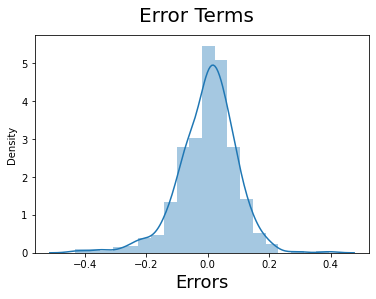

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Errors are normally distributed here with mean 0. So everything seems to be fine

#### Checking if the error terms are independent 

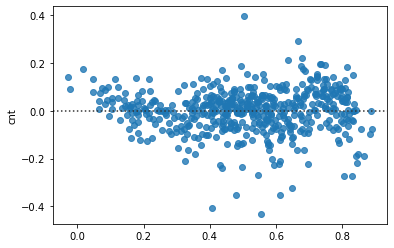

In [115]:
# Residual analysis for independence 
sns.residplot(x=y_train_pred, y=y_train - y_train_pred )
plt.show()


We can see residual points are scattered about the y = 0 line , this is normally distributed about the center. 
Hence the model seems fine.

### Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final,i.e Model 7

In [116]:
#Calculating r-squared for the training data
r_squared_train = r2_score(y_train, y_train_pred)

In [117]:
r_squared_train

0.8225173906649428

#### Applying the scaling on the test sets

In [118]:
num_vars1 = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars1] = scaler.transform(df_test[num_vars1]) #transform the test data

In [119]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Clear,Light Snow/Rain,Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.155251,0.132420,0.173516,0.155251,0.118721,0.123288,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.362974,0.339723,0.379560,0.362974,0.324202,0.329520,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [120]:
y_test = df_test.pop('cnt')
X_test = df_test

In [121]:
# Adding constant variable to test dataframe
#col8 contains the final list of variables


X_test_m7 = sm.add_constant(X_test[col8])

In [122]:
# Making predictions on the test set based on final model--> Model 7
y_test_pred = model7.predict(X_test_m7)


In [123]:
y_test_pred

184    0.336295
535    0.851568
299    0.411274
221    0.609235
152    0.578901
         ...   
400    0.357951
702    0.727308
127    0.469308
640    0.754393
72     0.239351
Length: 219, dtype: float64

In [124]:
y_test_pred.describe()

count    219.000000
mean       0.514740
std        0.196768
min       -0.124135
25%        0.386564
50%        0.528722
75%        0.649756
max        0.881902
dtype: float64

In [125]:
#Calculating r-squared for the test data
r_squared_test = r2_score(y_test, y_test_pred)

In [126]:
r_squared_test 

0.8092200832884748

We can see r-squared value for the test data is about 81% which is good. 

### Step 9: Model Evaluation

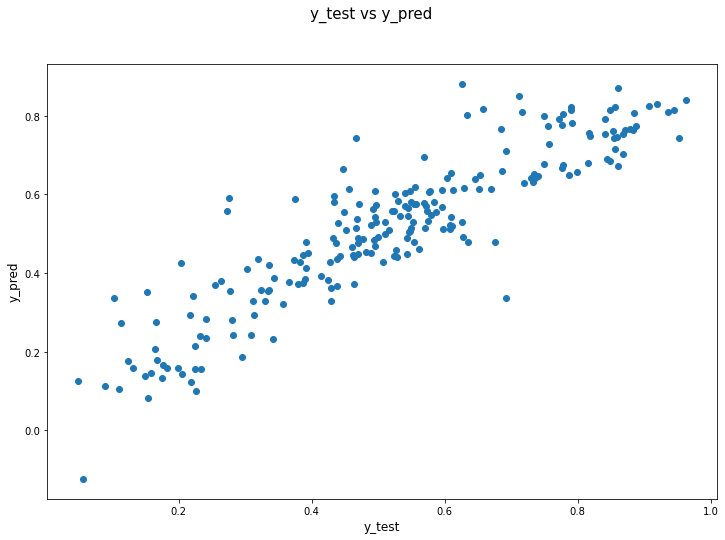

In [127]:

# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=[12,8])
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)               
plt.xlabel('y_test', fontsize = 12)                          
plt.ylabel('y_pred', fontsize = 12)  
plt.show(fig)

#### Comparing R-squared value

In [128]:
#Calculating r-squared for the training data
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_train

0.8225173906649428

In [129]:
#Calculating r-squared for the test data
r_squared_test = r2_score(y_test, y_test_pred)
r_squared_test 

0.8092200832884748

##### We can see that the R-squared value of the training data(.8225) and the test data is nearby(.8092). Hence the model is performing good.

#### Comparing Adjusted R-squared value

In [130]:
#For TEST data
# n is number of rows in X

n = X_test.shape[0]


# Number of predictors, p
p = X_test.shape[1]

# Adjusted R2

adjusted_r2_test = 1-((1-r_squared_test)*(n-1)/(n-p-1))
adjusted_r2_test

0.7799469743750662

In [131]:
#FOR TRAINING DATA
# n is number of rows in X

n = X_train.shape[0]


# Number of predictors, p
p = X_train.shape[1]

# Adjusted R2

adjusted_r2_train = 1-((1-r_squared_train)*(n-1)/(n-p-1))
adjusted_r2_train

0.8117944830176165

Observation:
* We can see that the adjusted R-squared value for test data is about 78% and R-squared value for test data is about 81% . Hence we can see the difference is less than 5% hence the model is working fine.    


* r_squared_test--->=0.81
* adjusted_r2_test---->=0.78
* The difference is less than 5% hence it is acceptable and the model is working fine.

### Final Equation:

y = const+ m1X1+m2X2+m3X3+......+mnXn

cnt = 0.1938+0.2330xyr-0.1011xholiday+0.4712xtemp-0.1107xspring(season)+0.0558xwinter(season)-0.0688xjuly(month)+0.0658xsep(month)-0.3002xLight Snow/Rain-0.0796xMist &cloudy

### Conclusions:

Based on our model, the variables that are significant in predicting the demand for shared bikes are:
* temp
* Light Snow/Rain
* year
* season(winter and spring)
* month(july and sep)
* weatherit(Light Snow and Mist & cloudy)
* holiday


Factors that are contributing in demand positively according to the model are:
* year
* temp
* winter season
* sep month


Factors that are contributing in demand negatively according to the model are:
* holiday
* spring season
* july month
* Light Snow/Rain
* Mist and cloudy

Inferences:
* Company should bring out some offers for the spring season and the holidays.
* Company can increase the rental offerings in winter season and do more business as more and more people want rental bikes in winter season.
* rentals would increase in the upcoming year as judged from the prior two years data.